[0.16996731711975954, 0.1186342028003479, 0.21256807188565546, 0.07200822998230955]


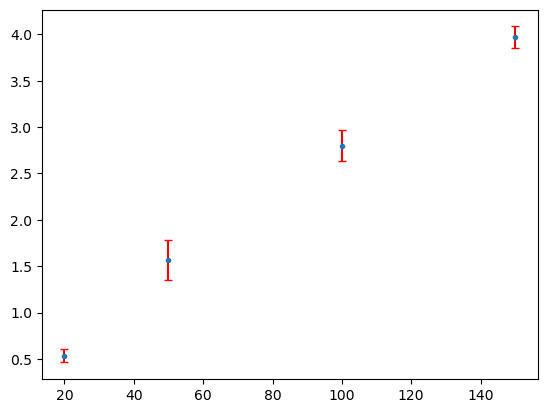

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Data = np.genfromtxt('første.csv', delimiter=',' , skip_header=1)

Temp = Data[:,3]
Vending = [100 , 150 , 50 , 20]


Gm_temp = []
Usikker = []
for x in range(0,4,1):
    Gm_temp.append(sum(Temp[x*3:x*3+3])/3)
    Usikker.append(np.std((Temp[x*3:x*3+3]))/(np.sqrt(3)))

plt.errorbar(Vending , Gm_temp, Usikker, fmt='.', capsize=3, ecolor='red')
print(Usikker)

0.027951140674186307 para
[0.00103053 0.08294553]
369.3763904441627 varme
12.953080215428816 usikker

 chi^2
0.8608726506879323
0.5115155466072783


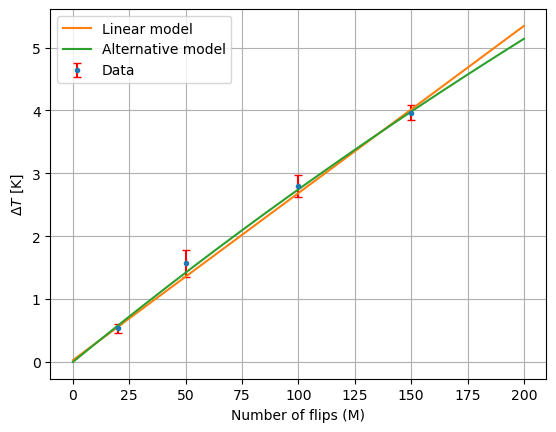

In [17]:
def Lin(x,a,b):
    return a*x+b

def Alt(x,k,b):
    return (x)/(x*k+b)

Par_lin, Cov_lin = curve_fit(Lin, Vending , Gm_temp , sigma=Usikker , absolute_sigma=True)
Par_alt, Cov_alt = curve_fit(Alt, Vending , Gm_temp , sigma=Usikker , absolute_sigma=True)

Usikker_lin=np.sqrt(np.diagonal(Cov_lin))
Usikker_alt=np.sqrt(np.diagonal(Cov_alt))

xx = np.linspace(0,200,1000)
yy = Lin(xx, *Par_lin)
yy_alt = Alt(xx, *Par_alt)
plt.errorbar(Vending , Gm_temp, Usikker, fmt='.', capsize=3, ecolor='red', label='Data')
plt.plot(xx,yy, label='Linear model')
plt.plot(xx, yy_alt, label='Alternative model')
plt.xlabel('Number of flips (M)')
plt.ylabel('$\Delta T$ [K]')
plt.grid()
plt.legend()

print(Par_lin[1], 'para')
print(Usikker_lin)
print(9.82/0.02658534831690726 , 'varme')

print(9.82*(Par_lin[1])**(-2) * 0.00103053 , 'usikker')

# Heat capacity prediction from the second model
print(9.82*Par_alt[2], 'varme')
print(Par_alt[2]*9.82 * Usikker_alt[2] , 'usikker')


# for x in range(len(Gm_temp)):
#     print((9.82*Vending[x]/Gm_temp[x]) , 9.82*Vending[x]*Gm_temp[x]**(-2))
    

chi = []

for x in range(len(Gm_temp)):
    chi.append((Gm_temp[x] - Lin(Vending[x] , *Par_lin))**2/Usikker[x]**2)

print("\n chi^2")
Kvadrat_lin = sum(chi) / 2
print(Kvadrat_lin)

chi = []

for x in range(len(Gm_temp)):
    chi.append((Gm_temp[x] - Alt(Vending[x] , *Par_alt))**2/Usikker[x]**2)

Kvadrat_alt = sum(chi) / 2
print(Kvadrat_alt)
